<a href="https://colab.research.google.com/github/jankipatel1065/EMP_project-/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Janki  Patel(N01533282)</br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Bhavish Rohila (N01532797)</br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Meet Trivedi(N01520331).

#Mobile Price Predication

###About Dataset
#####Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.Phraphase it

#Importing Library

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from matplotlib import style
style.use('dark_background')
import pandas as pd
import seaborn as sns

#Loading dataset

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/project/Project/Mobile_price_Prediction/Mobile_Price_Predication.csv")


#Print 5 rows of the datset


In [3]:
data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#summary of a DataFrame

In [4]:
print("data describe() provides data type, not null count, and memory usuage\n\n")
data.info()


data describe() provides data type, not null count, and memory usuage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-

## Explanation:

Dataset as 21 features and 2000 entries. The meanings of the features are given below.

- battery_power: Total energy a battery can store in one time measured in mAh
- blue: Has Bluetooth or not
- clock_speed: Speed at which the microprocessor executes instructions
- dual_sim: Has dual SIM support or not
- fc: Front Camera mega pixels
- four_g: Has 4G or not
- int_memory: Internal Memory in Gigabytes
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of the mobile phone
- n_cores: Number of cores of the processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Byte
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: Longest time that a single battery charge will last when you are
- three_g: Has 3G or not
- touch_screen: Has a touch screen or not
- wifi: Has Wi-Fi or not
- price_range: This is the target variable with values of 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost).


In [5]:
print("data describe() computes statistics of the numerical columns in the DataFrame\nsuch as count, mean, standard deviation, minimum, 25th percentile (Q1),\nmedian (50th percentile or Q2), 75th percentile (Q3), \nand maximum for each numerical column in the DataFrame\n\n")
data.describe().T

data describe() computes statistics of the numerical columns in the DataFrame
such as count, mean, standard deviation, minimum, 25th percentile (Q1),
median (50th percentile or Q2), 75th percentile (Q3), 
and maximum for each numerical column in the DataFrame




,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


#Check missing values

In [6]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
print("0 missing values")

0 missing values


In [8]:
# Step 1: Calculate the correlation matrix (you have already done this)
correlation_matrix = data.corr()

# Step 2: Get the absolute correlation coefficients for each feature
abs_correlation = correlation_matrix.abs()

# Step 3: Sort the features based on their absolute correlation coefficients in descending order
sorted_features = abs_correlation.unstack().sort_values(ascending=False)

top_n = 26  # This will include all columns
most_important_features = sorted_features[:21]

# Display the most important features
print("Most important features:")
print(most_important_features)

Most important features:
battery_power  battery_power    1.0
px_height      px_height        1.0
dual_sim       dual_sim         1.0
fc             fc               1.0
four_g         four_g           1.0
int_memory     int_memory       1.0
m_dep          m_dep            1.0
mobile_wt      mobile_wt        1.0
n_cores        n_cores          1.0
px_width       px_width         1.0
blue           blue             1.0
ram            ram              1.0
sc_h           sc_h             1.0
sc_w           sc_w             1.0
talk_time      talk_time        1.0
three_g        three_g          1.0
touch_screen   touch_screen     1.0
wifi           wifi             1.0
clock_speed    clock_speed      1.0
pc             pc               1.0
price_range    price_range      1.0
dtype: float64


# Extracting features and labels

In [9]:
#price_range is dependent variable so it should be a target column for database.

X = data.drop(['price_range'], axis = 1).values

In [10]:
y = data['price_range'].values

In [11]:
X

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [12]:
#  0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost).
np.unique(y)

array([0, 1, 2, 3])

# Splitting the data into test and train

In [13]:
#X= features of the data(2000*21)
#y= target variable
#test_size= 0% of the data will be used for testing, and the remaining 80% will be used for training
#random_state= split with sepcial value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#data had 200 rows and 21 columns. after spliting data, testing data has 400 rows and 20 columns.
X_test.shape


(400, 20)

# Standardizing the data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Applying Naive Baye's Classifier

In [16]:
# Create a Naive Bayes classifier and fit it on the training data
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_NB = naive_bayes.predict(X_test_scaled)

# Evaluate the performance of the model
accuracy_nb = accuracy_score(y_test, y_pred_NB)
print("accuracy : %2.2f" % (accuracy_nb))

accuracy : 0.80


#Generating Confusion Matrix

In [17]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)

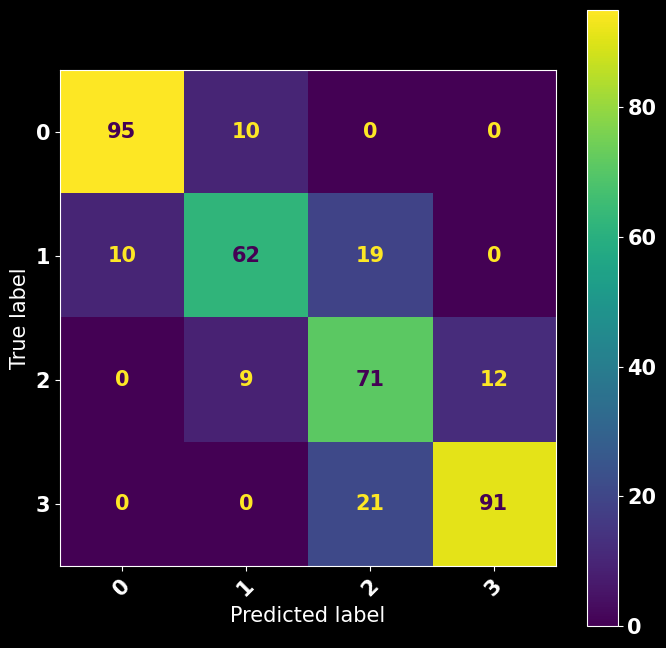

In [18]:
cm = confusion_matrix(y_test, y_pred_NB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1,2,3])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

#Calculating Accuracy, Precision, Recall, F1-Score

In [19]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_NB, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_NB, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_NB, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_NB, average = 'macro')]})

In [20]:
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.7975,0.798332,0.79258,0.792928


#Applying knn Method

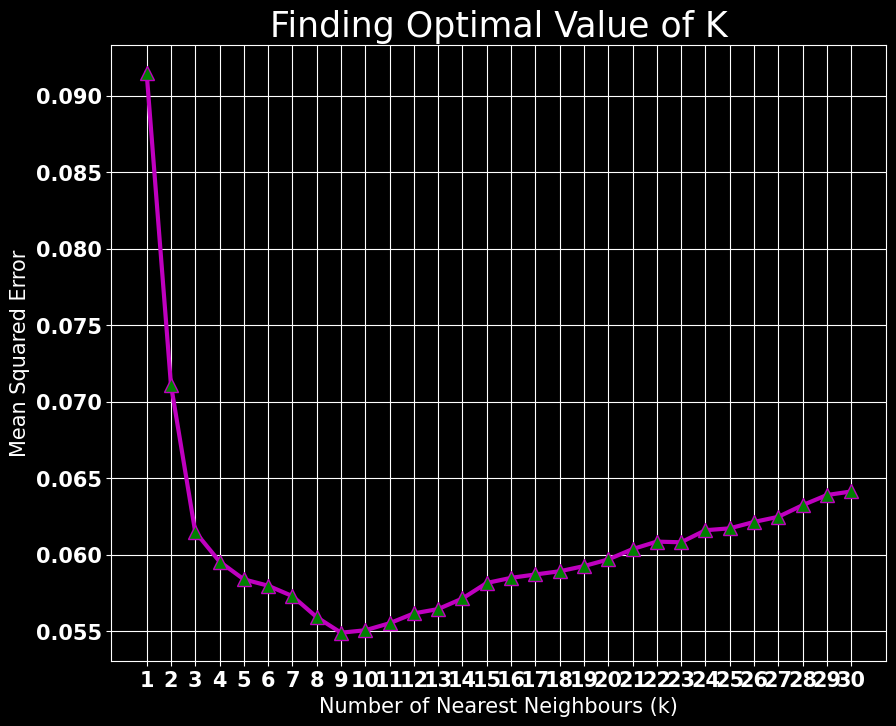

Optimal Value of K: 9


In [21]:
# Create a list of k values to test (let's say from 1 to 30)
k_values = range(1, 31)

# Create an empty list to store the mean squared errors for each k value
mse_values = []
# Create a list of k values to test (let's say from 1 to 30)
k_values = range(1, 31)

# Create an empty list to store the mean squared errors for each k value
mse_values = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    # Calculate the mean squared error using 5-fold cross-validation
    mse = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    mse_values.append(mse)

# Find the optimal k with the lowest mean squared error
optimal_k = k_values[np.argmin(mse_values)]

# Plot the error rates for each k value
plt.figure(figsize=(10, 8))
plt.plot(k_values, mse_values, 'm', lw=3, marker='^', markerfacecolor='g', markersize=10)
plt.title('Finding Optimal Value of K', fontsize=25)
plt.xlabel('Number of Nearest Neighbours (k)', fontsize=15)
plt.ylabel('Mean Squared Error', fontsize=15)
plt.xticks(k_values)
plt.grid(True)
plt.show()

print("Optimal Value of K:", optimal_k)

In [22]:
# Create and train the KNN classifier
k_neighbors = 9  # You can experiment with different values for k
knn_classifier = KNeighborsClassifier(n_neighbors=k_neighbors)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("accuracy : %2.2f" % (accuracy_knn))

accuracy : 0.95


#Generating Confusion Matrix for knn method

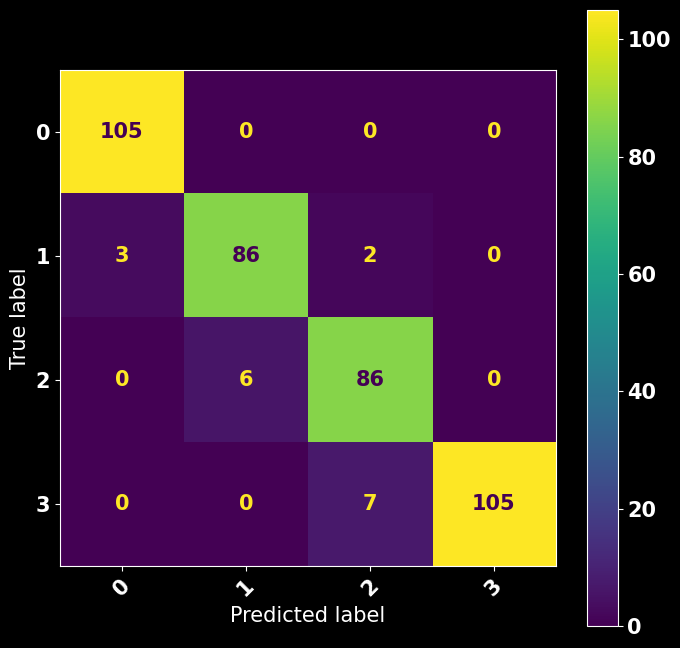

In [23]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1,2,3])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

#Calculating Accuracy, Precision, Recall, F1-Score for knn

In [24]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_knn, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_knn, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_knn, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_knn, average = 'macro')]})
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.955,0.953067,0.954334,0.953334


# Applying Decision Tree

In [35]:
# Create a Decision Tree Regressor model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict mobile prices on the test set
y_pred_dt = model.predict(X_test)

#Accuracy
Accuracy_dt = np.mean(y_pred_dt == y_test)
print("accuracy : %2.2f" % (Accuracy_dt))


accuracy : 0.84


# Generating Confusion Matrics

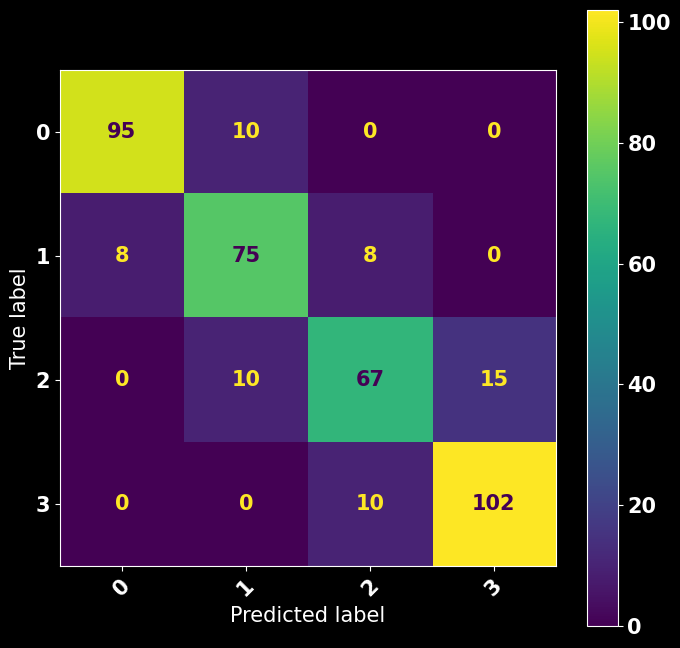

In [26]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1,2,3])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

#Calculating Accuracy, Precision, Recall, F1-Score for dt

In [27]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_dt, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_dt, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_dt, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_dt, average = 'macro')]})
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.8475,0.842958,0.841978,0.841951


#Visualizing the decision tree

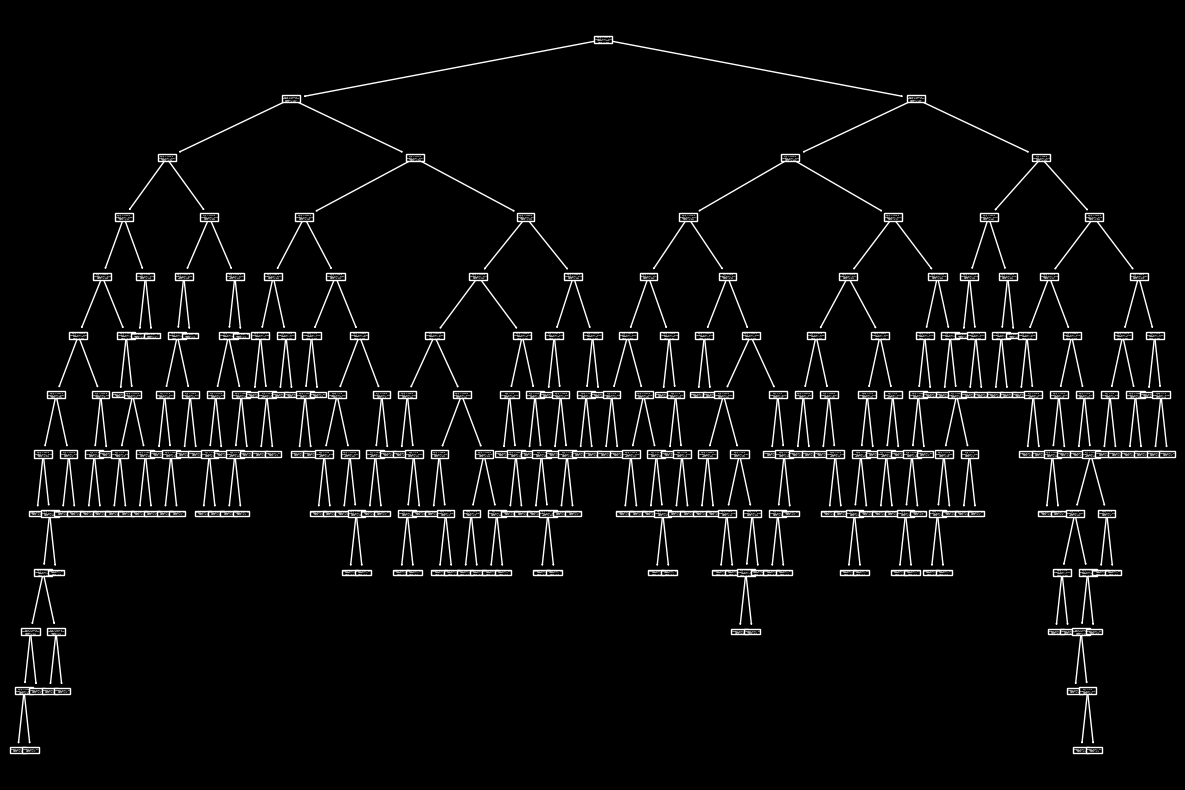

In [28]:
plt.figure(figsize=(15, 10))
plot_tree(model)
plt.show()


In [29]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a dictionary to map feature indices to their corresponding names
feature_index_to_name = {index: f"Feature_{index}" for index in range(len(feature_importances))}

# Find and print important features with their corresponding names
important_features_indices = feature_importances.argsort()[::-1]
num_top_features = 5  # Change this number to display more or fewer top features

print(f"Top {num_top_features} important features:")
for i in range(num_top_features):
    feature_index = important_features_indices[i]
    feature_name = feature_index_to_name[feature_index]
    feature_importance = feature_importances[feature_index]
    print(f"{i+1}. {feature_name}: {feature_importance:.4f}")


Top 5 important features:
1. Feature_13: 0.8640
2. Feature_0: 0.0538
3. Feature_12: 0.0308
4. Feature_11: 0.0266
5. Feature_7: 0.0048


#Logistic Regression

In [34]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred_lr = model_lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_lr)


#Accuracy
Accuracy_lr = np.mean(y_pred_lr == y_test)
print("Avg accuracy : %2.2f" % (Accuracy_lr))





Avg accuracy : 0.97


#Generating Confusion Matrics

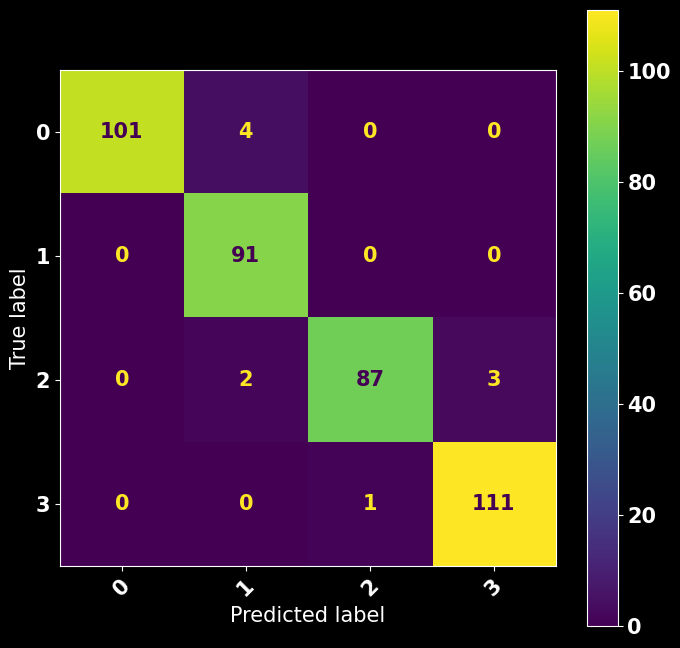

In [31]:
font = {
    'weight' : 'bold',
    'size'   : 15}
plt.rc('font', **font)
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1,2,3])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

# Calculating Precision, Recall and F1-Score

In [32]:
Metrics = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_lr, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_lr, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_lr, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_lr, average = 'macro')]})
Metrics

,Accuracy,Precision,Recall,F1-Score
0,0.975,0.975116,0.974657,0.974409


In [36]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',  'Decision Tree Classifier','Naive bays'],
    'Score': [Accuracy_lr, accuracy_knn, Accuracy_dt, accuracy_nb]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic Regression,0.9750
1,KNN,0.9550
2,Decision Tree Classifier,0.8425
3,Naive bays,0.7975


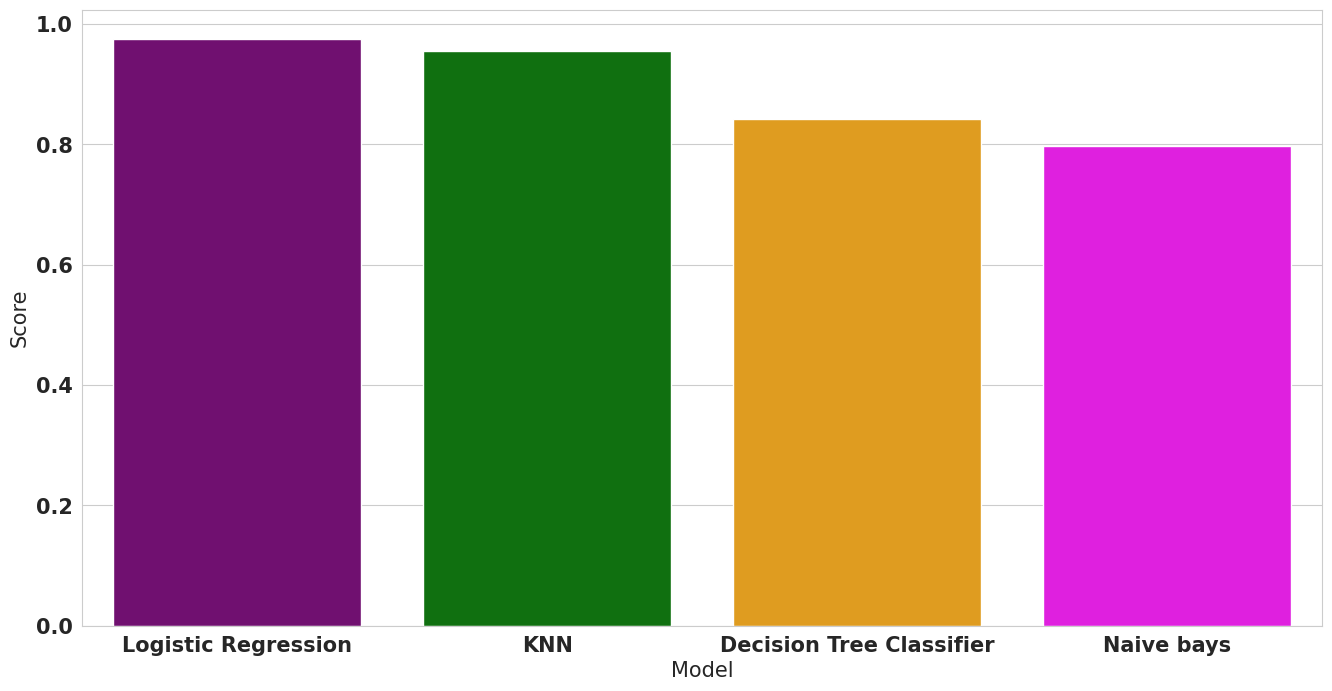

In [37]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()